In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv 
from sklearn.svm import SVC
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score


In [2]:
def draw_svm(clf, x, y, x1_min, x1_max, x2_min, x2_max, target=None):
    """
    Draws the decision boundary of an svm.
    :param clf: sklearn.svm.SVC classifier
    :param x: data Nx2
    :param y: label N
    :param x1_min: minimum value of the x-axis of the plot
    :param x1_max: maximum value of the x-axis of the plot
    :param x2_min: minimum value of the y-axis of the plot
    :param x2_max: maximum value of the y-axis of the plot
    :param target: if target is set to path, the plot is saved to that path
    :return: None
    """
    y = y.astype(bool)
    xx, yy = np.meshgrid(np.linspace(x1_min, x1_max, 500),
                         np.linspace(x2_min, x2_max, 500))
    z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)
    disc_z = z > 0
    plt.clf()
    plt.imshow(disc_z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
               origin='lower', cmap=plt.cm.RdBu, alpha=.3)
    plt.contour(xx, yy, z, levels=[-1, 1], linewidths=2,
                linestyles='dashed', colors=['red', 'blue'], alpha=0.5)
    plt.contour(xx, yy, z, levels=[0], linewidths=2,
                linestyles='solid', colors='black', alpha=0.5)
    positives = x[y == 1]
    negatives = x[y == 0]
    plt.scatter(positives[:, 0], positives[:, 1], s=50, marker='o', color="none", edgecolor="black")
    plt.scatter(negatives[:, 0], negatives[:, 1], s=50, marker='s', color="none", edgecolor="black")
    sv_label = y[clf.support_]
    positive_sv = x[clf.support_][sv_label]
    negative_sv = x[clf.support_][~sv_label]
    plt.scatter(positive_sv[:, 0], positive_sv[:, 1], s=50, marker='o', color="white", edgecolor="black")
    plt.scatter(negative_sv[:, 0], negative_sv[:, 1], s=50, marker='s', color="white", edgecolor="black")
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.gca().set_aspect('equal', adjustable='box')
    if target is None:
        plt.show()
    else:
        plt.savefig(target)

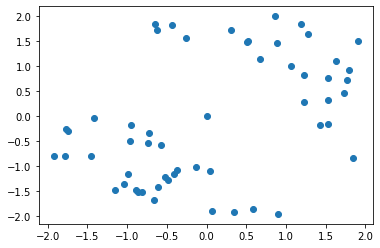

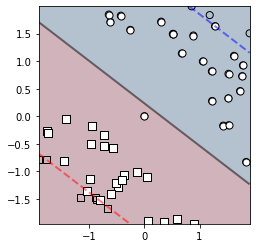

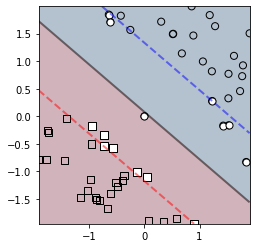

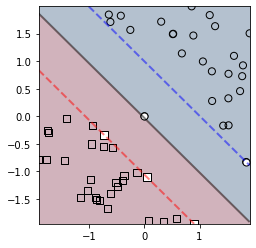

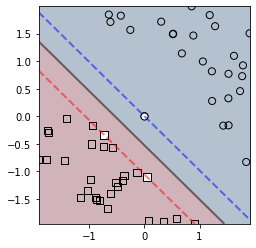

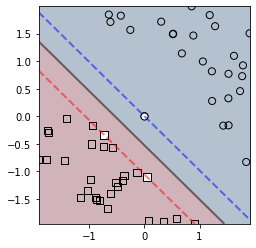

In [3]:
# Task-1
train_set1 = np.load('svm/task1/train_set.npy')
train_lbs1 = np.load('svm/task1/train_labels.npy')


x1 = train_set1
y1 = train_lbs1

# Plot the sample data
plt.scatter(x1[:,0],x1[:,1])
plt.show()

c_values1 = [0.01,0.1,1,10,100]
# Train an SVM with linear kernel and C
for c in c_values1:
    clf = SVC(kernel='linear', C=c)
    clf = clf.fit(x1, y1)
    draw_svm(clf, x1, y1, x1[:, 0].min(), x1[:, 0].max(), x1[:, 1].min(), x1[:, 1].max())




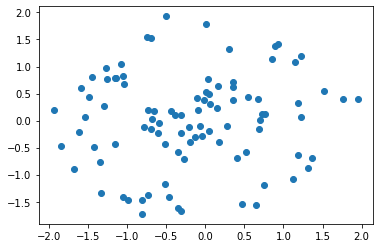

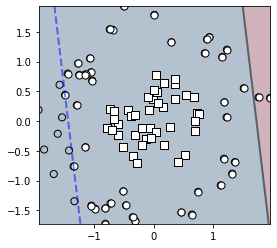

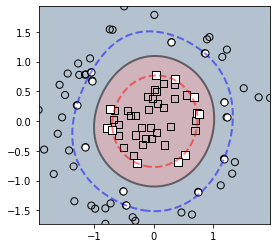

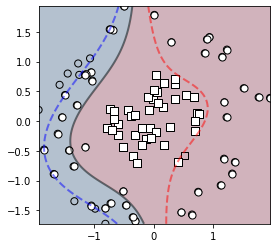

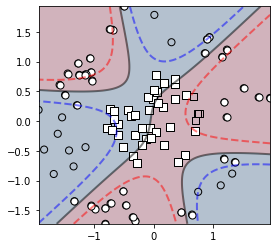

In [4]:
# Task-2
train_set2 = np.load('svm/task2/train_set.npy')
train_lbs2 = np.load('svm/task2/train_labels.npy')

x2 = train_set2
y2 = train_lbs2

# Plot the sample data
plt.scatter(x2[:,0],x2[:,1])
plt.show()

kernels2 = ['linear','rbf','poly','sigmoid']
# Train an SVM with kernel and C
for kernel in kernels2:
    clf = SVC(kernel= kernel, C=1)
    clf = clf.fit(x2, y2)
    draw_svm(clf, x2, y2, x2[:, 0].min(), x2[:, 0].max(), x2[:, 1].min(), x2[:, 1].max())

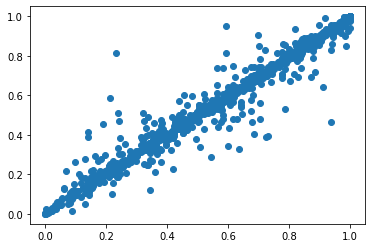

Best Parameters: ['rbf', 100, 0.01, 79.0]
Test Accuracy: 81.0


In [5]:
# Task-3
train_set3 = np.load('svm/task3/train_set.npy')
train_lbs3 = np.load('svm/task3/train_labels.npy')
test_set3 = np.load('svm/task3/test_set.npy')
test_lbs3 = np.load('svm/task3/test_labels.npy')

x3 = train_set3.reshape((train_set3.shape[0],train_set3.shape[1]**2))
y3 = train_lbs3

train_set_3 = x3[:int(0.8 * len(x3))]
val_set_3 = x3[int(0.8 * len(x3)):]

train_label_3 = y3[:int(0.8 * len(x3))]
val_label_3 = y3[int(0.8 * len(x3)):]

test_set3 = test_set3.reshape((test_set3.shape[0],test_set3.shape[1]**2))
# Plot the sample data
plt.scatter(x3[:,0],x3[:,1])
plt.show()

# Try for different hyperparameters
kernels3 = ['linear','rbf','poly','sigmoid']
c_values3 = [0.01,0.1,1,10,100]
g_values3= [0.01,0.1,1,10,100]
result_list = []
for kernel in kernels3:
    for c in c_values3:
        for g in g_values3:
            clf = SVC(kernel= kernel, C=c, gamma=g)
            clf = clf.fit(train_set_3,train_label_3)
            predicted_3 = clf.predict(val_set_3)
            cm = confusion_matrix(val_label_3,predicted_3)
            result_list.append([kernel,c,g,((cm[0][0]+cm[1][1])/np.sum(cm)*100)])
#Get max parameters and fit and test model again
max_parameters = max(result_list, key=lambda x: x[3]) 
clf = SVC(kernel = max_parameters[0],C=max_parameters[1],gamma=max_parameters[2])
clf = clf.fit(x3,y3)
best_predict = clf.predict(test_set3)
best_cm = confusion_matrix(test_lbs3,best_predict)
print(f'Best Parameters: {max_parameters}')
print(f'Test Accuracy: {(best_cm[0][0]+best_cm[1][1])/np.sum(best_cm)*100}')
#Print file
file = open('Result.csv', 'w+', newline ='') 
with file:     
    write = csv.writer(file) 
    write.writerows(result_list) 


In [6]:
train_set4 = np.load('svm/task4/train_set.npy')
train_lbs4 = np.load('svm/task4/train_labels.npy')
test_set4 = np.load('svm/task4/test_set.npy')
test_lbs4 = np.load('svm/task4/test_labels.npy')

test_set4 = test_set4.reshape((test_set4.shape[0],test_set4.shape[1]**2))

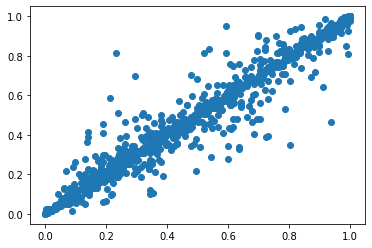

Test Accuracy: 95.0
Recall: 1.000
Precision: 0.950
recall: 1.0, precision: 0.95, F-Score: 0.9743589743589743
Recall: 0.000
Precision: 0.000
recall: 0.0, precision: 0.0, F-Score: nan


C:\Users\aygun\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aygun\AppData\Local\Temp/ipykernel_12824/3930836744.py:29: RuntimeWarning: invalid value encountered in double_scalars
  fscore1 = (2*precision1*recall1)/(precision1+recall1)


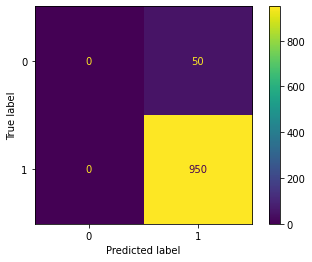

In [7]:
#Subtask-1
x4 = train_set4.reshape((train_set4.shape[0],train_set4.shape[1]**2))
y4 = train_lbs4

# Plot the sample data
plt.scatter(x4[:,0],x4[:,1])
plt.show()


clf1 = SVC(kernel='rbf', C=1)
clf1 = clf1.fit(x4,y4)
predicted_1 = clf1.predict(test_set4)
cm1 = confusion_matrix(test_lbs4,predicted_1)
print(f'Test Accuracy: {(cm1[0][0]+cm1[1][1])/np.sum(cm1)*100}')

#Get label 1 as positive
recall1 = recall_score(test_lbs4, predicted_1, average='binary',pos_label=1)
print('Recall: %.3f' % recall1)
precision1 = precision_score(test_lbs4, predicted_1, average='binary',pos_label=1)
print('Precision: %.3f' % precision1)
fscore1 = (2*precision1*recall1)/(precision1+recall1)
print(f'recall: {recall1}, precision: {precision1}, F-Score: {fscore1}')

#Get label 0 as positive
recall1 = recall_score(test_lbs4, predicted_1, average='binary',pos_label=0)
print('Recall: %.3f' % recall1)
precision1 = precision_score(test_lbs4, predicted_1, average='binary',pos_label=0)
print('Precision: %.3f' % precision1)
fscore1 = (2*precision1*recall1)/(precision1+recall1)
print(f'recall: {recall1}, precision: {precision1}, F-Score: {fscore1}')

matrix1 = ConfusionMatrixDisplay.from_predictions(test_lbs4,predicted_1)



950 950
Test Accuracy: 95.1
Recall: 0.988
Precision: 0.961
recall: 0.988421052631579, precision: 0.9611054247697032, F-Score: 0.9745718733783082
Recall: 0.240
Precision: 0.522
recall: 0.24, precision: 0.5217391304347826, F-Score: 0.3287671232876712


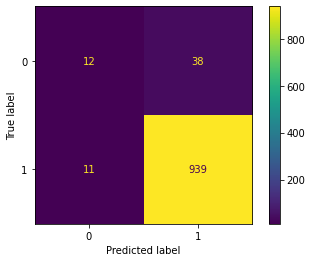

In [8]:
#Subtask-2
x4 = train_set4.reshape((train_set4.shape[0],train_set4.shape[1]**2))
y4 = train_lbs4

ones = np.count_nonzero(y4)
zeros = len(y4) - ones

#Copy data and balance them
while(zeros < ones):
    for i in range(len(y4)):
        if (y4[i] == 0):
            x4 = np.append(x4,[x4[i]],axis=0)
            y4 = np.append(y4,[y4[i]],axis=0)
            zeros += 1
            if(zeros == ones):
                break   

print(zeros, ones) 
clf2 = SVC(kernel='rbf', C=1)
clf2 = clf2.fit(x4,y4)
predicted_2 = clf2.predict(test_set4)
cm2 = confusion_matrix(test_lbs4,predicted_2)
print(f'Test Accuracy: {(cm2[0][0]+cm2[1][1])/np.sum(cm2)*100}')

#Get label 1 as positive
recall2 = recall_score(test_lbs4, predicted_2, average='binary',pos_label=1)
print('Recall: %.3f' % recall2)
precision2 = precision_score(test_lbs4, predicted_2, average='binary',pos_label=1)
print('Precision: %.3f' % precision2)
fscore2 = (2*precision2*recall2)/(precision2+recall2)
print(f'recall: {recall2}, precision: {precision2}, F-Score: {fscore2}')

#Get label 0 as positive
recall2 = recall_score(test_lbs4, predicted_2, average='binary',pos_label=0)
print('Recall: %.3f' % recall2)
precision2 = precision_score(test_lbs4, predicted_2, average='binary',pos_label=0)
print('Precision: %.3f' % precision2)
fscore2 = (2*precision2*recall2)/(precision2+recall2)
print(f'recall: {recall2}, precision: {precision2}, F-Score: {fscore2}')

matrix2 = ConfusionMatrixDisplay.from_predictions(test_lbs4,predicted_2)


50 950
50 50
Test Accuracy: 79.80000000000001
Recall: 0.792
Precision: 0.978
recall: 0.792, precision: 0.9782608695652174, F-Score: 0.8753315649867374
Recall: 0.660
Precision: 0.151
recall: 0.66, precision: 0.15137614678899083, F-Score: 0.24626865671641793


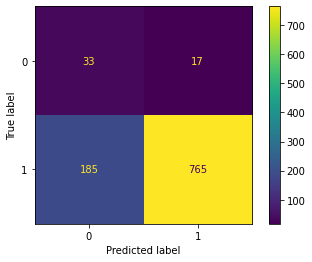

In [9]:
x4 = train_set4.reshape((train_set4.shape[0],train_set4.shape[1]**2))
y4 = train_lbs4

ones = np.count_nonzero(y4)
zeros = len(y4) - ones
print(zeros, ones) 

indexs = []

for i in range(len(y4)):
    if (y4[i] == 1):
        indexs.append(i)
difference = ones - zeros
indexs = indexs[:difference]
#Delete data and balance them
x4 = np.delete(x4,indexs,axis=0)
y4 = np.delete(y4,indexs,axis=0)
ones = np.count_nonzero(y4)
zeros = len(y4) - ones
print(zeros, ones)             
clf3 = SVC(kernel='rbf', C=1)
clf3 = clf3.fit(x4,y4)
predicted_3 = clf3.predict(test_set4)
cm3 = confusion_matrix(test_lbs4,predicted_3)
print(f'Test Accuracy: {(cm3[0][0]+cm3[1][1])/np.sum(cm3)*100}')


#Get label 1 as positive
recall3 = recall_score(test_lbs3, predicted_3, average='binary',pos_label=1)
print('Recall: %.3f' % recall3)
precision3 = precision_score(test_lbs4, predicted_3, average='binary',pos_label=1)
print('Precision: %.3f' % precision3)
fscore3 = (2*precision3*recall3)/(precision3+recall3)
print(f'recall: {recall3}, precision: {precision3}, F-Score: {fscore3}')

#Get label 0 as positive
recall3 = recall_score(test_lbs4, predicted_3, average='binary',pos_label=0)
print('Recall: %.3f' % recall3)
precision3 = precision_score(test_lbs4, predicted_3, average='binary',pos_label=0)
print('Precision: %.3f' % precision3)
fscore3 = (2*precision3*recall3)/(precision3+recall3)
print(f'recall: {recall3}, precision: {precision3}, F-Score: {fscore3}')

matrix3 = ConfusionMatrixDisplay.from_predictions(test_lbs4,predicted_3)


Test Accuracy: 93.60000000000001
Recall: 0.968
Precision: 0.964
recall: 0.968421052631579, precision: 0.9643605870020965, F-Score: 0.9663865546218487
Recall: 0.320
Precision: 0.348
recall: 0.32, precision: 0.34782608695652173, F-Score: 0.3333333333333333


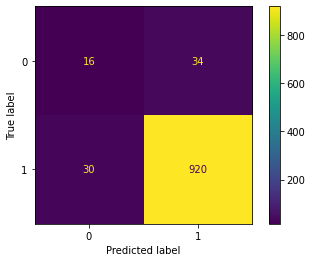

In [10]:
#Make class weight balanced
x4 = train_set4.reshape((train_set4.shape[0],train_set4.shape[1]**2))
y4 = train_lbs4
clf4 = SVC(kernel='rbf', C=1,class_weight='balanced')
clf4 = clf4.fit(x4,y4)
predicted_4 = clf4.predict(test_set4)
cm4 = confusion_matrix(test_lbs4,predicted_4)
print(f'Test Accuracy: {(cm4[0][0]+cm4[1][1])/np.sum(cm4)*100}')


#Get label 1 as positive
recall4 = recall_score(test_lbs4, predicted_4, average='binary',pos_label=1)
print('Recall: %.3f' % recall4)
precision4 = precision_score(test_lbs4, predicted_4, average='binary',pos_label=1)
print('Precision: %.3f' % precision4)
fscore4 = (2*precision4*recall4)/(precision4+recall4)
print(f'recall: {recall4}, precision: {precision4}, F-Score: {fscore4}')

#Get label 0 as positive
recall4 = recall_score(test_lbs4, predicted_4, average='binary',pos_label=0)
print('Recall: %.3f' % recall4)
precision4 = precision_score(test_lbs4, predicted_4, average='binary',pos_label=0)
print('Precision: %.3f' % precision4)
fscore4 = (2*precision4*recall4)/(precision4+recall4)
print(f'recall: {recall4}, precision: {precision4}, F-Score: {fscore4}')

matrix4 = ConfusionMatrixDisplay.from_predictions(test_lbs4,predicted_4)